In [26]:
# muiltiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import random

# 读取数据

In [93]:
data = pd.read_csv('data_13_22.csv', sep=';')

In [94]:
data.head()
data[data['rank']==201].index
data = data.drop(data[data['rank']==201].index).reset_index(drop=True)
data.shape

,Movie,Distributor,Genre,Gross,Tickets Sold,rank,releaseYear
0,Iron Man 3,Walt Disney,Action,408992272,50306552,1,2013
1,The Hunger Games: Catching ...,Lionsgate,Adventure,407139699,50078683,2,2013
2,Despicable Me 2,Universal,Adventure,367956735,45259130,3,2013
3,Frozen,Walt Disney,Musical,296691729,36493447,4,2013
4,Man of Steel,Warner Bros.,Action,291045518,35798956,5,2013


Int64Index([200, 401, 602, 803, 1004, 1205, 1406, 1607, 1808, 2009], dtype='int64')

(2000, 7)

# 获取xy坐标

In [95]:
x = []
y = []
with open('song-coordinate.txt') as f: 
    line = f.readline()
    while line: 
        line = line[1:-2].split(',')
        x.append(float(line[0]))
        y.append(float(line[1]))
        line = f.readline()
coor = pd.DataFrame({'x': x, 'y': y}).iloc[:2000, :]
coor.shape

(2000, 2)

In [96]:
# coor_sorted = coor.sort_values(by=['x']).reset_index(drop=True)
# coor_sorted.head(20)

# 添加xy坐标

In [97]:
data.shape, coor.shape
data.tail()
coor.tail()

((2000, 7), (2000, 2))

,Movie,Distributor,Genre,Gross,Tickets Sold,rank,releaseYear
1995,Tyson's Run,Collide Distribution,Drama,391167,37432,196,2022
1996,The Inspection,A24,Drama,385627,36902,197,2022
1997,Alice,Roadside Attractions,Thriller/Suspense,373037,35697,198,2022
1998,Selena,Warner Bros.,Drama,360000,39258,199,2022
1999,Inu-Oh,GKIDS,Musical,351558,33641,200,2022


,x,y
1995,993.76,167.32
1996,1708.64,238.17
1997,419.48,258.65
1998,1772.06,333.59
1999,1548.91,254.69


In [98]:
data_crop = pd.concat([data, coor], axis=1)
data_crop.head()
data_crop.shape

,Movie,Distributor,Genre,Gross,Tickets Sold,rank,releaseYear,x,y
0,Iron Man 3,Walt Disney,Action,408992272,50306552,1,2013,887.85,169.88
1,The Hunger Games: Catching ...,Lionsgate,Adventure,407139699,50078683,2,2013,930.50,265.54
2,Despicable Me 2,Universal,Adventure,367956735,45259130,3,2013,784.02,145.53
3,Frozen,Walt Disney,Musical,296691729,36493447,4,2013,859.17,281.43
4,Man of Steel,Warner Bros.,Action,291045518,35798956,5,2013,815.22,302.71


(2000, 9)

# 更改column names

In [99]:
# data_crop.columns = ['rank', 'title', 'releaseYear', 'artist', 
#                      'listType', 'listHighestRank', 'Tickets Sold', 'x', 'y']
data_crop.columns = ['title', 'artist', 'listType', 'listHighestRank', 
                     'Tickets Sold', 'rank_each_year', 'releaseYear', 'x', 'y']

In [100]:
data_crop.head()

,title,artist,listType,listHighestRank,Tickets Sold,rank_each_year,releaseYear,x,y
0,Iron Man 3,Walt Disney,Action,408992272,50306552,1,2013,887.85,169.88
1,The Hunger Games: Catching ...,Lionsgate,Adventure,407139699,50078683,2,2013,930.50,265.54
2,Despicable Me 2,Universal,Adventure,367956735,45259130,3,2013,784.02,145.53
3,Frozen,Walt Disney,Musical,296691729,36493447,4,2013,859.17,281.43
4,Man of Steel,Warner Bros.,Action,291045518,35798956,5,2013,815.22,302.71


In [106]:
data_crop['rank'] = data_crop['listHighestRank'].rank(ascending=False)
data_crop.iloc[195:205, :]

,title,artist,listType,listHighestRank,Tickets Sold,rank_each_year,releaseYear,x,y,rank
195,Hotel Transylvania,Sony Pictures,Adventure,2140687,263307,196,2013,750.72,397.97,1702.0
196,Austenland,Sony Pictures Cla...,Romantic Comedy,2137573,262924,197,2013,1833.99,167.10,1704.0
197,Blackfish,Magnolia Pictures,Documentary,2073582,255053,198,2013,1874.12,248.22,1708.0
198,The Iceman,Alchemy,Drama,1930282,237427,199,2013,1250.11,306.01,1717.0
199,Fill the Void,Sony Pictures Cla...,Drama,1774639,218282,200,2013,1348.39,212.61,1726.0
200,Guardians of the Galaxy,Walt Disney,Action,333055258,40765637,1,2014,1228.34,181.13,45.0
201,The Hunger Games: Mockingja...,Lionsgate,Thriller/Suspense,323734502,39624786,2,2014,1393.82,152.58,50.0
202,Captain America: The Winter...,Walt Disney,Action,259746958,31792773,3,2014,1557.28,329.19,58.0
203,The Lego Movie,Warner Bros.,Adventure,257784718,31552597,4,2014,1801.66,347.47,59.0
204,Transformers: Age of Extinc...,Paramount Pictures,Action,245439076,30041502,5,2014,811.69,112.85,61.0


In [108]:
data_crop['listHighestRank'] = data_crop['listHighestRank'].apply(lambda x: np.log(x))

In [111]:
data_crop.head()
data_crop.tail()

,title,artist,listType,listHighestRank,Tickets Sold,rank_each_year,releaseYear,x,y,rank
0,Iron Man 3,Walt Disney,Action,19.829207,50306552,1,2013,887.85,169.88,23.0
1,The Hunger Games: Catching ...,Lionsgate,Adventure,19.824667,50078683,2,2013,930.50,265.54,25.0
2,Despicable Me 2,Universal,Adventure,19.723476,45259130,3,2013,784.02,145.53,33.0
3,Frozen,Walt Disney,Musical,19.508204,36493447,4,2013,859.17,281.43,52.0
4,Man of Steel,Warner Bros.,Action,19.488990,35798956,5,2013,815.22,302.71,53.0


,title,artist,listType,listHighestRank,Tickets Sold,rank_each_year,releaseYear,x,y,rank
1995,Tyson's Run,Collide Distribution,Drama,12.876890,37432,196,2022,993.76,167.32,1887.0
1996,The Inspection,A24,Drama,12.862626,36902,197,2022,1708.64,238.17,1889.0
1997,Alice,Roadside Attractions,Thriller/Suspense,12.829433,35697,198,2022,419.48,258.65,1892.0
1998,Selena,Warner Bros.,Drama,12.793859,39258,199,2022,1772.06,333.59,1896.0
1999,Inu-Oh,GKIDS,Musical,12.770130,33641,200,2022,1548.91,254.69,1900.0


In [109]:
data_crop.to_csv('data_coordinates.csv')

In [105]:
?pd.DataFrame.rank

# 添加circles

In [30]:
radius = list(np.linspace(start=2, stop=25, num=2000))
random.shuffle(radius)

In [33]:
!pip show packcircles

Name: packcircles
Version: 0.14
Summary: A pure Python implementation of a circle packing algorithm
Home-page: https://github.com/mhtchan/packcircles
Author: mhtchan
Author-email: mhtchan@outlook.com
License: MIT
Location: /Users/leongvan/opt/anaconda3/lib/python3.7/site-packages
Requires: pyllist
Required-by: 


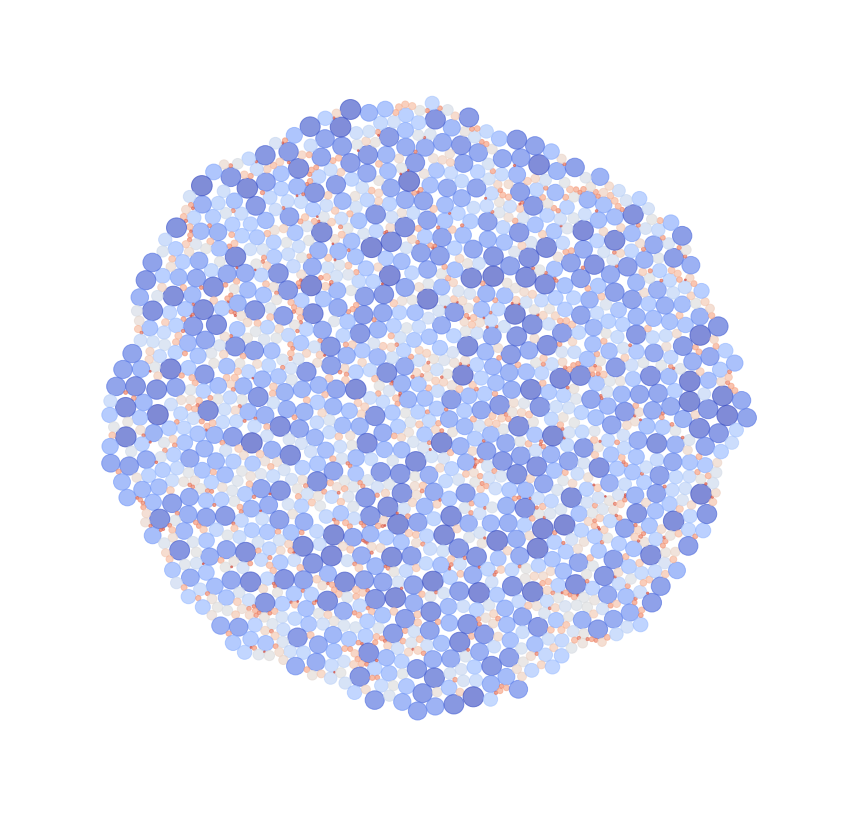

In [31]:
import packcircles as pc
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
# radii = [28,12,51,26,10,16,24,25,59,11,29,40,16,11,10,26,39,16,48,36,28]
radii = radius
# radii = [1, 2, 3]
fig, ax = plt.subplots()
cmap = get_cmap('coolwarm_r')
circles = pc.pack(radii)
for (x,y,radius) in circles:
#     print('x: {0}, y: {1}'.format(x, y))
    patch = plt.Circle(
        (x,y),
        radius,
        color=cmap(radius/max(radii)),
        alpha=0.65
    )
    ax.add_patch(patch)
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set(xlim=(-1000, 1000), ylim=(-1000, 1000))
plt.axis('off')
plt.show();